##Testing with Pre Trained Models

https://huggingface.co/prithivMLmods/Deep-Fake-Detector-Model


@misc{Deep-Fake-Detector-Model,
  author = {prithivMLmods},
  title = {Deep-Fake-Detector-Model},
  initial = {21 Mar 2024},
  last_updated = {31 Jan 2025}
}


In [1]:
from transformers import pipeline

# Load the model
pipe = pipeline('image-classification', model="prithivMLmods/Deep-Fake-Detector-Model", device=0)




/Users/arunava/Documents/Final-Project/Prototype/newEnv/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.50, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.
Device set to use mps:0


In [2]:
# Predict on an image
result = pipe("/Users/arunava/Documents/CM3050_Mobile_Dev/tableview/assets/puppy.jpg")
print(result)

[{'label': 'Real', 'score': 0.5277137160301208}, {'label': 'Fake', 'score': 0.47228628396987915}]


# All code below has been written from scratch to build an Image Classifier. Only the lines above have been used to test Image classification using a trained model

Creating a model for Image Classification

In [5]:
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define paths
train_data_dir = "/Users/arunava/.cache/kagglehub/datasets/birdy654/cifake-real-and-ai-generated-synthetic-images/versions/3/train"
test_data_dir = "/Users/arunava/.cache/kagglehub/datasets/birdy654/cifake-real-and-ai-generated-synthetic-images/versions/3/test"

# Rescale pixel values to [0, 1]
train_datagen = ImageDataGenerator(rescale=1.0 / 255)  
test_datagen = ImageDataGenerator(rescale=1.0 / 255)  

# training data from the directory, which contains FAKE and REAL subdirectories
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(150, 150), 
    batch_size=32,
    class_mode='binary',   
    shuffle=True             
)

# Loading testing data from the directory, which contains FAKE and REAL subdirectories
test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(150, 150),  
    batch_size=32,
    class_mode='binary',   
    shuffle=False          
)


Found 100000 images belonging to 2 classes.
Found 20000 images belonging to 2 classes.


In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Create a sequential model
model = Sequential()

# Add convolutional and pooling layers
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid')) 

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

print("Model Summary:")
model.summary() 


Model Summary:


/Users/arunava/Documents/Final-Project/Prototype/newEnv/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 82944)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    10,616,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,636,481 (40.57 MB)

 Trainable params: 10,636,481 (40.57 MB)

 Non-trainable params: 0 (0.00 B)

In [7]:
# Train the model
model.fit(train_generator, 
          steps_per_epoch=train_generator.samples // train_generator.batch_size, 
          epochs=10)


Epoch 1/10


/Users/arunava/Documents/Final-Project/Prototype/newEnv/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


3125/3125 ━━━━━━━━━━━━━━━━━━━━ 391s 125ms/step - accuracy: 0.8200 - loss: 0.4101
Epoch 2/10
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 389s 125ms/step - accuracy: 0.9166 - loss: 0.2067
Epoch 3/10
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 383s 123ms/step - accuracy: 0.9465 - loss: 0.1364
Epoch 4/10
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 384s 123ms/step - accuracy: 0.9651 - loss: 0.0919
Epoch 5/10
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 384s 123ms/step - accuracy: 0.9798 - loss: 0.0554
Epoch 6/10
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 383s 123ms/step - accuracy: 0.9866 - loss: 0.0378
Epoch 7/10
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 392s 125ms/step - accuracy: 0.9895 - loss: 0.0299
Epoch 8/10
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 379s 121ms/step - accuracy: 0.9911 - loss: 0.0255
Epoch 9/10
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 383s 123ms/step - accuracy: 0.9930 - loss: 0.0232
Epoch 10/10
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 391s 125ms/step - accuracy: 0.9939 - loss: 0.0181


In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns


In [9]:
# Get predictions from the test data generator
test_generator.reset()  # Reset the generator to ensure predictions are made on the correct data
predictions = model.predict(test_generator)
predicted_classes = (predictions > 0.5).astype(int)  # Convert probabilities to binary (0 or 1)

# Get true classes from the generator
true_classes = test_generator.classes  # Ground truth classes


  1/625 ━━━━━━━━━━━━━━━━━━━━ 1:10 112ms/step

/Users/arunava/Documents/Final-Project/Prototype/newEnv/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


625/625 ━━━━━━━━━━━━━━━━━━━━ 19s 30ms/step


In [11]:
# Calculate classification report without output_dict to inspect labels
report = classification_report(true_classes, predicted_classes, target_names=['Fake', 'Real'])
print(report)  # Print the classification report



              precision    recall  f1-score   support

        Fake       0.92      0.93      0.93     10000
        Real       0.93      0.92      0.92     10000

    accuracy                           0.92     20000
   macro avg       0.92      0.92      0.92     20000
weighted avg       0.92      0.92      0.92     20000



In [12]:
# Fix according to the keys present in the report
report_dict = classification_report(true_classes, predicted_classes, target_names=['Fake', 'Real'], output_dict=True)

# Check the keys available in report_dict
print(report_dict)

# the keys are lowercase now
accuracy = report_dict['accuracy']
precision = report_dict['Real']['precision']  # Adjust if the key is actually 'real' or 'REAL' or lowercase
recall = report_dict['Real']['recall']
f1_score = report_dict['Real']['f1-score']


{'Fake': {'precision': 0.9178311356032277, 'recall': 0.9327, 'f1-score': 0.925205832754687, 'support': 10000.0}, 'Real': {'precision': 0.9315917869485668, 'recall': 0.9165, 'f1-score': 0.9239842726081258, 'support': 10000.0}, 'accuracy': 0.9246, 'macro avg': {'precision': 0.9247114612758973, 'recall': 0.9246, 'f1-score': 0.9245950526814064, 'support': 20000.0}, 'weighted avg': {'precision': 0.9247114612758971, 'recall': 0.9246, 'f1-score': 0.9245950526814064, 'support': 20000.0}}


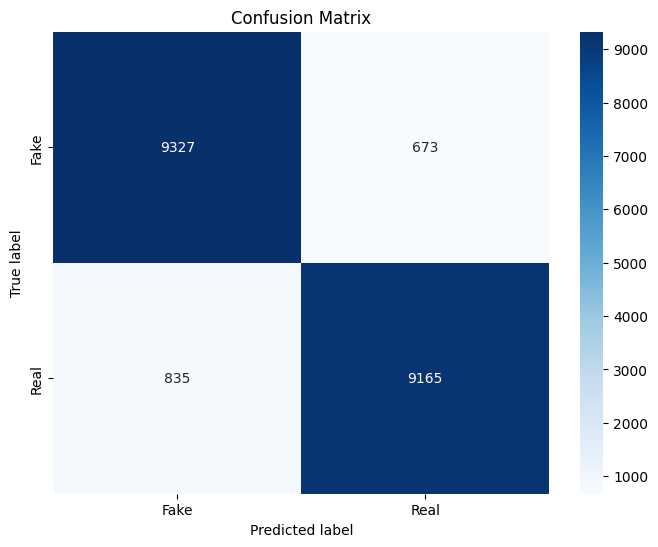

In [13]:
# Function to plot confusion matrix
def plot_confusion_matrix(cm):
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=['Fake', 'Real'], yticklabels=['Fake', 'Real'])
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.title('Confusion Matrix')
    plt.show()

# Plot the confusion matrix
plot_confusion_matrix(cm)


In [16]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
# Calculate the ROC curve

predicted_probabilities = predictions.flatten()
fpr, tpr, thresholds = roc_curve(true_classes, predicted_probabilities)

# Calculate AUC
roc_auc = auc(fpr, tpr)
print(f'AUC: {roc_auc:.2f}')

AUC: 0.98


In [17]:
# Get true classes from the generator
true_classes = test_generator.classes  # Ground truth classes

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(true_classes, predicted_probabilities)

# Calculate AUC
roc_auc = auc(fpr, tpr)
print(f'AUC: {roc_auc:.2f}')


AUC: 0.98


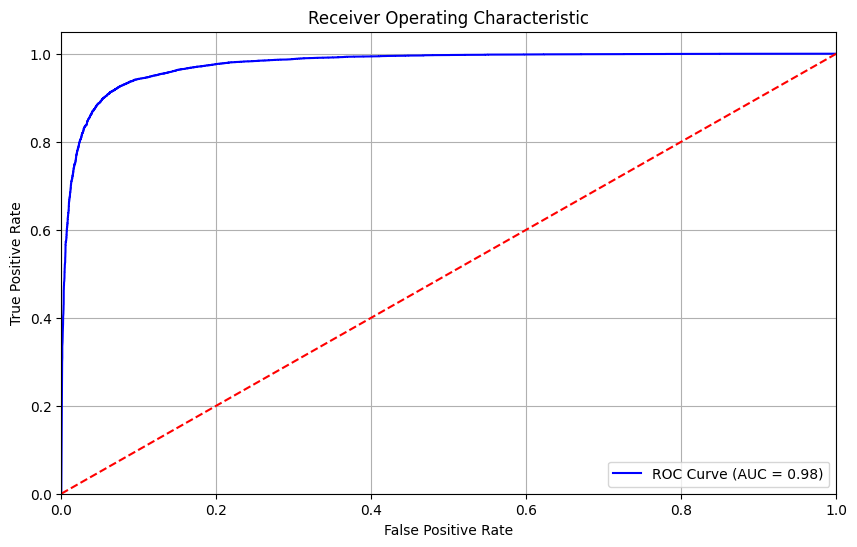

In [18]:
# Plot the ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Diagonal line (no discrimination)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.grid()
plt.show()


In [19]:

output_folder = "/Users/arunava/Documents/Final-Project/Prototype/user_accessible_models/"
model.save(os.path.join(output_folder, 'cifake_image_classifier_model.h5'))
